In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import math
import sklearn
import re
import xgboost
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, precision_score,recall_score

In [3]:
data=pd.read_csv("Phishing_Mitre_Dataset_Summer_of_AI.csv")
data.head(10)

,create_age(months),expiry_age(months),update_age(days),URL,Label
0,-1,-1,-1,http://account-google-com.ngate.my/c44cca40176...,1
1,212,16,663,http://www.coffeespecialties.com/...,0
2,-1,-1,-1,http://black.pk/wp-content/2013/04/bp.postale/...,1
3,198,6,186,http://atomicsoda.com/manutd...,0
4,240,24,1684,http://bostoncoffeecake.com/...,0
5,-1,-1,-1,http://www.durst.de/...,0
6,98,10,57,http://www.jobofmine.com/...,0
7,2,10,61,http://safetem.com/fcid/login.php?cmd=login_su...,1
8,21,3,280,http://elicafe.com/...,1
9,-1,-1,-1,http://www.vgl.ucdavis.edu/informatics/strand....,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4799 entries, 0 to 4798
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   create_age(months)  4799 non-null   int64 
 1   expiry_age(months)  4799 non-null   int64 
 2   update_age(days)    4799 non-null   int64 
 3   URL                 4799 non-null   object
 4   Label               4799 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 187.6+ KB


In [5]:
data.isnull()

,create_age(months),expiry_age(months),update_age(days),URL,Label
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4794,False,False,False,False,False
4795,False,False,False,False,False
4796,False,False,False,False,False
4797,False,False,False,False,False


<AxesSubplot:xlabel='Label', ylabel='count'>

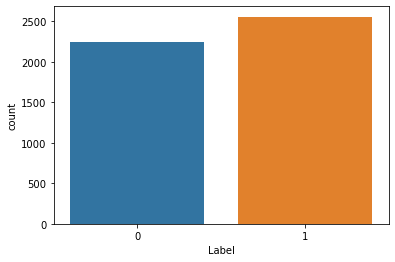

In [6]:
#Count phising label
sns.countplot(x="Label", data=data)

In [8]:
#Check Special Character 
def Special_Character(string):   
    symbol = re.compile('[@_!#$%^&*()<>?|}{~]') 
    i=0
    for char in string:   
        if(symbol.search(char)): 
            i+=1
    return i
#Chek Digit
def get_digit(str):
    i=0
    for char in str: 
        if char.isdigit():
            i+=1
    return i
def entropy(url):
        string = url.strip()
        prob = [float(string.count(c)) / len(string) for c in dict.fromkeys(list(string))]
        entropy = sum([(p * math.log(p) / math.log(2.0)) for p in prob])
        return entropy
    
def SubDomains(url):
    subdomains = url.split('http')[-1].split('//')[-1].split('/')
    return len(subdomains)-1

def transform(data):
    data.insert(2,'len_url', [len(url) for url in data['URL']])

    data.insert(2,'digit',[get_digit(url) for url in data['URL']])

    data.insert(2,'character',[Special_Character(url) for url in data['URL']])

    data.insert(2, 'percentage', [('%' in url) for url in data['URL']])

    data.insert(2, 'subdomain', [SubDomains(url) for url in data['URL']])

    del data['URL']

transform(data)

KeyError: 'URL'

# XGBoost Classifier

In [9]:
#split into parameters and label for supervised learning
X=data.drop("Label",axis=1)
y=data["Label"]
data_dmatrix=xgboost.DMatrix(data=X, label=y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [11]:
x_regression = xgboost.XGBClassifier(learning_rate=0.5)
x_regression.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
predicts = x_regression.predict(X_test)
predictions = [round(value) for value in predicts]
rms = np.sqrt(mean_squared_error(y_test, predictions)) #score = accuracy_score(y_test,predictions)
print("F1 Score on training dataset:")
f1 = f1_score(y_test, predicts)
print(f1*100,"%")

F1 Score on training dataset:
94.65954606141523 %


In [15]:
print("Precision_score:",precision_score(y_test, predicts)*100)

Precision_score: 94.28191489361703


In [16]:
print("Recall_score:",recall_score(y_test, predicts)*100)

Recall_score: 95.04021447721179


In [18]:
classification_report(y_test,predicts)

'              precision    recall  f1-score   support\n\n           0       0.95      0.94      0.94       694\n           1       0.94      0.95      0.95       746\n\n    accuracy                           0.94      1440\n   macro avg       0.94      0.94      0.94      1440\nweighted avg       0.94      0.94      0.94      1440\n'

In [19]:
print(accuracy_score(y_test,predicts)*100,"%")

94.44444444444444 %


# Random Forest Classifier

In [20]:
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [21]:
Random_forest_model = RandomForestClassifier(n_estimators = 100, criterion = "entropy",  random_state = 0)
Random_forest_model.fit(X_train, y_train)
prediction = Random_forest_model.predict(X_test)
cm = confusion_matrix(y_test, prediction)
print(cm)

[[652  42]
 [ 42 704]]


In [22]:
from sklearn.metrics import accuracy_score

In [23]:
print("Accuracy for Random forest Classifier :",accuracy_score(y_test,prediction)*100,"%")

Accuracy for Random forest Classifier : 94.16666666666667 %


In [24]:
predicts_R = Random_forest_model.predict(X_test)
predictions_R = [round(value) for value in predicts_R]
rms_R = np.sqrt(mean_squared_error(y_test, predictions_R)) #score = accuracy_score(y_test,predictions)
print("F1 Score on training dataset:")
f1 = f1_score(y_test, predicts)
print(f1*100,"%")

F1 Score on training dataset:
94.65954606141523 %


In [25]:
print("Precision_score:",precision_score(y_test, predicts_R)*100)

Precision_score: 94.36997319034852


In [28]:
print("Recall_score:",recall_score(y_test, predicts_R)*100)

Recall_score: 94.36997319034852


In [29]:
classification_report(y_test,predicts)

'              precision    recall  f1-score   support\n\n           0       0.95      0.94      0.94       694\n           1       0.94      0.95      0.95       746\n\n    accuracy                           0.94      1440\n   macro avg       0.94      0.94      0.94      1440\nweighted avg       0.94      0.94      0.94      1440\n'

# KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)

knn_confusion = confusion_matrix(y_test, knn_pred)
print(knn_confusion)

[[622  72]
 [ 65 681]]


In [31]:
print("Accuracy for KNN :",accuracy_score(y_test,knn_pred)*100,"%")

Accuracy for KNN : 90.48611111111111 %


In [32]:
predicts_knn = knn.predict(X_test)
predictions_knn = [round(value) for value in predicts_knn]
rms_knn = np.sqrt(mean_squared_error(y_test, predictions_knn)) #score = accuracy_score(y_test,predictions)
print("F1 Score on training dataset:")
f1 = f1_score(y_test, predicts_knn)
print(f1*100,"%")

F1 Score on training dataset:
90.86057371581055 %


In [33]:
print("Precision_score:",precision_score(y_test, predicts_knn)*100)

Precision_score: 90.43824701195219


In [34]:
print("Recall_score:",recall_score(y_test, predicts_knn)*100)

Recall_score: 91.28686327077749


In [35]:
classification_report(y_test,predicts_knn)

'              precision    recall  f1-score   support\n\n           0       0.91      0.90      0.90       694\n           1       0.90      0.91      0.91       746\n\n    accuracy                           0.90      1440\n   macro avg       0.90      0.90      0.90      1440\nweighted avg       0.90      0.90      0.90      1440\n'

# Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
naive_pred = model.predict(X_test)

naive_confusion = confusion_matrix(y_test, naive_pred)
print(naive_confusion)

[[655  39]
 [231 515]]


In [38]:
print("Accuracy for Decision Tree Alogorithm :",accuracy_score(y_test,naive_pred)*100,"%")

Accuracy for Decision Tree Alogorithm : 81.25 %


In [39]:
predicts_naive = model.predict(X_test)
predictions_naive = [round(value) for value in predicts_naive]
rms_naive = np.sqrt(mean_squared_error(y_test, predictions_naive)) #score = accuracy_score(y_test,predictions)
print("F1 Score on training dataset:")
f1 = f1_score(y_test, predicts_naive)
print(f1*100,"%")

F1 Score on training dataset:
79.23076923076923 %


In [47]:
print("Precision_score:",precision_score(y_test, naive_pred)*100)

Precision_score: 92.96028880866426


In [45]:
print("Recall_score:",recall_score(y_test, predicts_naive)*100)

Recall_score: 69.0348525469169


In [46]:
classification_report(y_test,predicts_naive)

'              precision    recall  f1-score   support\n\n           0       0.74      0.94      0.83       694\n           1       0.93      0.69      0.79       746\n\n    accuracy                           0.81      1440\n   macro avg       0.83      0.82      0.81      1440\nweighted avg       0.84      0.81      0.81      1440\n'

# Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
tree = DecisionTreeClassifier(criterion = 'entropy').fit(X_train,y_train)

In [50]:
tree_pred = tree.predict(X_test)

tree_confusion = confusion_matrix(y_test, tree_pred)
print(tree_confusion)

[[649  45]
 [ 73 673]]


In [51]:
print("Accuracy for Decision Tree Alogorithm :",accuracy_score(y_test,tree_pred)*100,"%")

Accuracy for Decision Tree Alogorithm : 91.80555555555556 %


In [52]:
predicts_tree = tree.predict(X_test)
predictions_tree = [round(value) for value in predicts_tree]
rms_tree = np.sqrt(mean_squared_error(y_test, predictions_tree)) #score = accuracy_score(y_test,predictions)
print("F1 Score on training dataset:")
f1 = f1_score(y_test, predicts_tree)
print(f1*100,"%")

F1 Score on training dataset:
91.93989071038253 %


In [53]:
print("Precision_score:",precision_score(y_test, predicts_tree)*100)

Precision_score: 93.7325905292479


In [54]:
print("Recall_score:",recall_score(y_test, predicts_tree)*100)

Recall_score: 90.21447721179625


In [55]:
classification_report(y_test,predicts_tree)

'              precision    recall  f1-score   support\n\n           0       0.90      0.94      0.92       694\n           1       0.94      0.90      0.92       746\n\n    accuracy                           0.92      1440\n   macro avg       0.92      0.92      0.92      1440\nweighted avg       0.92      0.92      0.92      1440\n'

# Logistic Regression

In [56]:
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, y_train)

LR_pred = LR.predict(X_test)

LR_confusion = confusion_matrix(y_test, LR_pred)
print(LR_confusion)

[[632  62]
 [ 91 655]]


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
print("Accuracy for Logistic Regression :",accuracy_score(y_test,LR_pred)*100,"%")

Accuracy for Logistic Regression : 89.375 %


In [58]:
predicts_LR = LR.predict(X_test)
predictions_LR = [round(value) for value in predicts_LR]
rms_LR = np.sqrt(mean_squared_error(y_test, predictions_LR)) #score = accuracy_score(y_test,predictions)
print("F1 Score on training dataset:")
f1 = f1_score(y_test, predicts_LR)
print(f1*100,"%")

F1 Score on training dataset:
89.54203691045797 %


In [59]:
print("Precision_score:",precision_score(y_test, predicts_LR)*100)

Precision_score: 91.35285913528591


In [60]:
print("Recall_score:",recall_score(y_test, predicts_LR)*100)

Recall_score: 87.80160857908848


In [61]:
classification_report(y_test,predicts_LR)

'              precision    recall  f1-score   support\n\n           0       0.87      0.91      0.89       694\n           1       0.91      0.88      0.90       746\n\n    accuracy                           0.89      1440\n   macro avg       0.89      0.89      0.89      1440\nweighted avg       0.89      0.89      0.89      1440\n'